### Dataloader pel model CNN

In [36]:
import os
import math
import librosa
import matplotlib.pyplot as plt
import json

# Directoris
dir_train = "./gtzan/_train"
dir_test = "./gtzan/_test"
dir_validation = "./gtzan/_validation"

# Caracteristiques del audio
sample_rate = 22050
length_track = 30 # Segons
samples_per_track = sample_rate*length_track

Caracteristiques per el processament del audi

In [37]:
n_fft = 2048
num_mfcc = 13
hop_length = 512

# En quan dividim l'audio de 30 segons per extreure el mfcc
num_segments = 5

samples_per_segment = int(samples_per_track / num_segments)
num_mfcc_vectors_per_segment = math.ceil(samples_per_segment / hop_length)

### Exemple extracció d'un sol fitxer

In [40]:
f =  "classical.00030.au"
file_path = os.path.join(dir_train, f)
signal, sample_rate = librosa.load(file_path, sr=sample_rate)

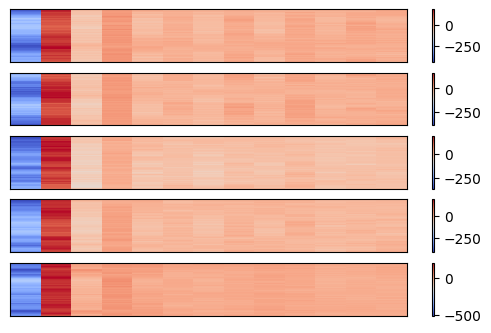

In [43]:
mfcc_img = []
genre = f[:-9]
plt.figure()

for s in range(num_segments):

    # calculate start and finish sample for current segment
    start = samples_per_segment * s
    finish = start + samples_per_segment

    # extract mfcc
    mfcc = librosa.feature.mfcc( y=signal[start:finish], sr=sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
    mfcc = mfcc.T
    
    # Fem plot abans de passarlo a llista 
    plt.subplot(num_segments+1,1,s+1)
    librosa.display.specshow(mfcc)
    plt.colorbar()

    # store only mfcc feature with expected number of vectors
    if len(mfcc) == num_mfcc_vectors_per_segment:
        mfcc_img.append(mfcc.tolist())


#### Extracció de les dades
Guardem les dades de train, test, i validation.
Ho guardem en un fitxer json per motius de facilitat

##### Train data

In [50]:
# Diccionari on guardem els mfcc i el genere
data = {
    "labels": [],
    "mfcc": []
}


# recorrem els fitxer dins de la carpet desitjada
for i, (dirpath, dirnames, filenames) in enumerate(os.walk(dir_train)):
    for f in filenames:

        # Carguem el audio
        file_path = os.path.join(dirpath, f)
        signal, sample_rate = librosa.load(file_path, sr=sample_rate)

        # Processem els segment del audio i ho guardem en el diccionari
        for s in range(num_segments):

            # Obtenim inici i final de segment
            start = samples_per_segment * s
            finish = start + samples_per_segment

            # obtenim el mfcc corresponent
            # importat el y= i sr=
            mfcc = librosa.feature.mfcc(y=signal[start:finish], sr=sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
            mfcc = mfcc.T

            # Guardem nomes aquells mfcc que coincideixin amb les mides determinades
            if len(mfcc) == num_mfcc_vectors_per_segment:
                data["mfcc"].append(mfcc.tolist())
                data["labels"].append(i-1)
                print("{}, segment:{}".format(file_path, s+1))

# Ho guardem a un fitxer .json
with open("train.json", "w") as fp:
    json.dump(data, fp, indent=4)


./gtzan/_train/pop.00033.au, segment:1
./gtzan/_train/pop.00033.au, segment:2
./gtzan/_train/pop.00033.au, segment:3
./gtzan/_train/pop.00033.au, segment:4
./gtzan/_train/pop.00033.au, segment:5
./gtzan/_train/metal.00097.au, segment:1
./gtzan/_train/metal.00097.au, segment:2
./gtzan/_train/metal.00097.au, segment:3
./gtzan/_train/metal.00097.au, segment:4
./gtzan/_train/metal.00097.au, segment:5
./gtzan/_train/jazz.00036.au, segment:1
./gtzan/_train/jazz.00036.au, segment:2
./gtzan/_train/jazz.00036.au, segment:3
./gtzan/_train/jazz.00036.au, segment:4
./gtzan/_train/jazz.00036.au, segment:5
./gtzan/_train/hiphop.00084.au, segment:1
./gtzan/_train/hiphop.00084.au, segment:2
./gtzan/_train/hiphop.00084.au, segment:3
./gtzan/_train/hiphop.00084.au, segment:4
./gtzan/_train/hiphop.00084.au, segment:5
./gtzan/_train/classical.00095.au, segment:1
./gtzan/_train/classical.00095.au, segment:2
./gtzan/_train/classical.00095.au, segment:3
./gtzan/_train/classical.00095.au, segment:4
./gtzan/_t

##### Validation data

In [47]:
# Diccionari on guardem els mfcc i el genere
data = {
    "labels": [],
    "mfcc": []
}


# recorrem els fitxer dins de la carpet desitjada
for i, (dirpath, dirnames, filenames) in enumerate(os.walk(dir_validation)):
    for f in filenames:

        # Carguem el audio
        file_path = os.path.join(dirpath, f)
        signal, sample_rate = librosa.load(file_path, sr=sample_rate)

        # Processem els segment del audio i ho guardem en el diccionari
        for s in range(num_segments):

            # Obtenim inici i final de segment
            start = samples_per_segment * s
            finish = start + samples_per_segment

            # obtenim el mfcc corresponent
            # importat el y= i sr=
            mfcc = librosa.feature.mfcc(y=signal[start:finish], sr=sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
            mfcc = mfcc.T

            # Guardem nomes aquells mfcc que coincideixin amb les mides determinades
            if len(mfcc) == num_mfcc_vectors_per_segment:
                data["mfcc"].append(mfcc.tolist())
                data["labels"].append(i-1)
                print("{}, segment:{}".format(file_path, s+1))

# Ho guardem a un fitxer .json
with open("validation.json", "w") as fp:
    json.dump(data, fp, indent=4)


./gtzan/_validation/reggae.00027.au, segment:1
./gtzan/_validation/reggae.00027.au, segment:2
./gtzan/_validation/reggae.00027.au, segment:3
./gtzan/_validation/reggae.00027.au, segment:4
./gtzan/_validation/reggae.00027.au, segment:5
./gtzan/_validation/reggae.00022.au, segment:1
./gtzan/_validation/reggae.00022.au, segment:2
./gtzan/_validation/reggae.00022.au, segment:3
./gtzan/_validation/reggae.00022.au, segment:4
./gtzan/_validation/reggae.00022.au, segment:5
./gtzan/_validation/pop.00029.au, segment:1
./gtzan/_validation/pop.00029.au, segment:2
./gtzan/_validation/pop.00029.au, segment:3
./gtzan/_validation/pop.00029.au, segment:4
./gtzan/_validation/pop.00029.au, segment:5
./gtzan/_validation/metal.00020.au, segment:1
./gtzan/_validation/metal.00020.au, segment:2
./gtzan/_validation/metal.00020.au, segment:3
./gtzan/_validation/metal.00020.au, segment:4
./gtzan/_validation/metal.00020.au, segment:5
./gtzan/_validation/hiphop.00019.au, segment:1
./gtzan/_validation/hiphop.00019.

### Test data

In [49]:
# Diccionari on guardem els mfcc i el genere
data = {
    "labels": [],
    "mfcc": []
}


# recorrem els fitxer dins de la carpet desitjada
for i, (dirpath, dirnames, filenames) in enumerate(os.walk(dir_test)):
    for f in filenames:

        # Carguem el audio
        file_path = os.path.join(dirpath, f)
        signal, sample_rate = librosa.load(file_path, sr=sample_rate)

        # Processem els segment del audio i ho guardem en el diccionari
        for s in range(num_segments):

            # Obtenim inici i final de segment
            start = samples_per_segment * s
            finish = start + samples_per_segment

            # obtenim el mfcc corresponent
            # importat el y= i sr=
            mfcc = librosa.feature.mfcc(y=signal[start:finish], sr=sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
            mfcc = mfcc.T

            # Guardem nomes aquells mfcc que coincideixin amb les mides determinades
            if len(mfcc) == num_mfcc_vectors_per_segment:
                data["mfcc"].append(mfcc.tolist())
                data["labels"].append(i-1)
                print("{}, segment:{}".format(file_path, s+1))

# Ho guardem a un fitxer .json
with open("test.json", "w") as fp:
    json.dump(data, fp, indent=4)


./gtzan/_test/classical.00005.au, segment:1
./gtzan/_test/classical.00005.au, segment:2
./gtzan/_test/classical.00005.au, segment:3
./gtzan/_test/classical.00005.au, segment:4
./gtzan/_test/classical.00005.au, segment:5
./gtzan/_test/pop.00000.au, segment:1
./gtzan/_test/pop.00000.au, segment:2
./gtzan/_test/pop.00000.au, segment:3
./gtzan/_test/pop.00000.au, segment:4
./gtzan/_test/pop.00000.au, segment:5
./gtzan/_test/classical.00001.au, segment:1
./gtzan/_test/classical.00001.au, segment:2
./gtzan/_test/classical.00001.au, segment:3
./gtzan/_test/classical.00001.au, segment:4
./gtzan/_test/classical.00001.au, segment:5
./gtzan/_test/hiphop.00006.au, segment:1
./gtzan/_test/hiphop.00006.au, segment:2
./gtzan/_test/hiphop.00006.au, segment:3
./gtzan/_test/hiphop.00006.au, segment:4
./gtzan/_test/hiphop.00006.au, segment:5
./gtzan/_test/classical.00006.au, segment:1
./gtzan/_test/classical.00006.au, segment:2
./gtzan/_test/classical.00006.au, segment:3
./gtzan/_test/classical.00006.au,